In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


> **Exploring the dataset about products reaching their customers on time and creating models to determine which one predicts the outcome better.**

In [11]:
df = pd.read_csv('Train.csv')

In [12]:
# F = 1, M = 0
df['Gender'] = (df['Gender'] == 'F').astype(int)

In [13]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [14]:
# 0 = low, 1 = medium, 2 = high
df.loc[df['Product_importance'] == 'low', 'Product_importance'] = 0
df.loc[df['Product_importance'] == 'medium', 'Product_importance'] = 1
df.loc[df['Product_importance'] == 'high', 'Product_importance'] = 2

In [15]:
# 0 = Flight, 1 = Road, 2 = Ship
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].astype('category')
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].cat.codes

In [16]:
# 3 = D, 4 = F, 0 = A, 1 = B, C = 2
df['Warehouse_block'] = df['Warehouse_block'].astype('category')
df['Warehouse_block'] = df['Warehouse_block'].cat.codes

In [17]:
import matplotlib.pyplot as plt

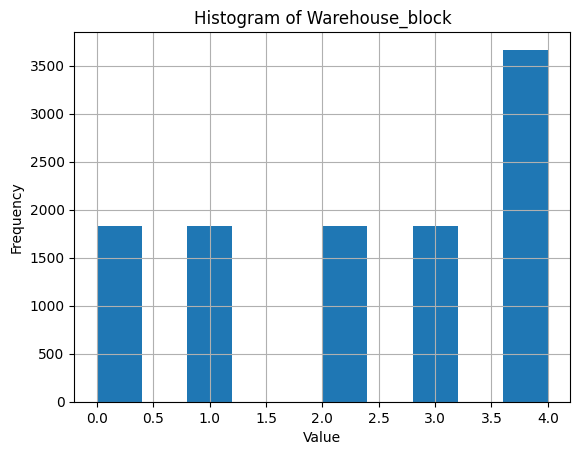

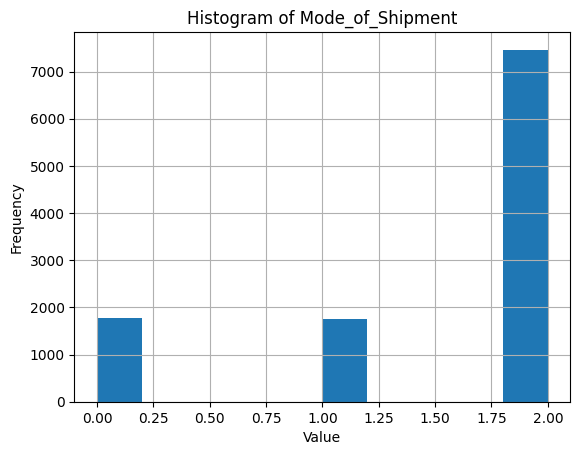

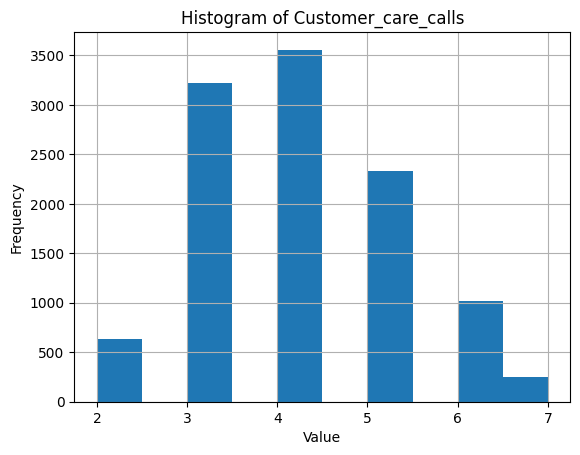

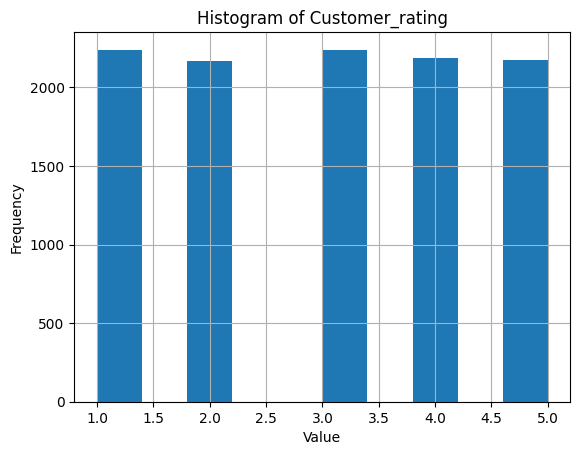

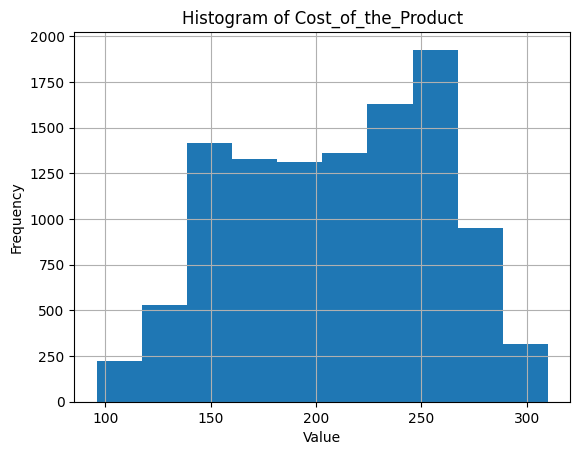

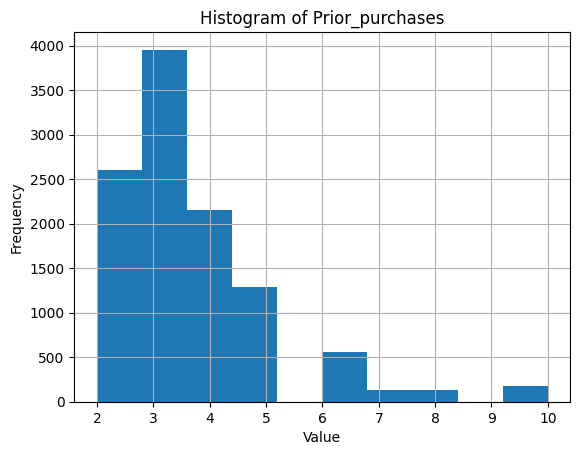

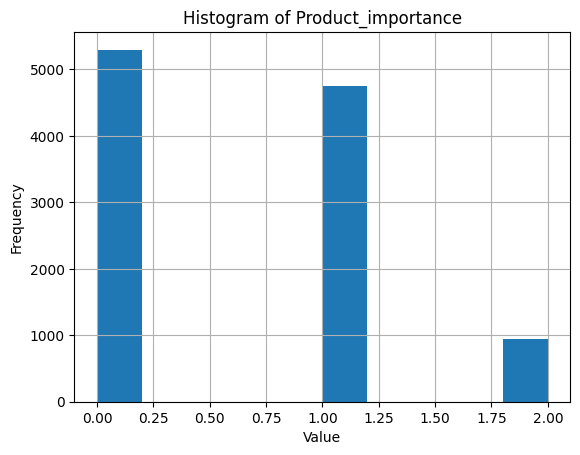

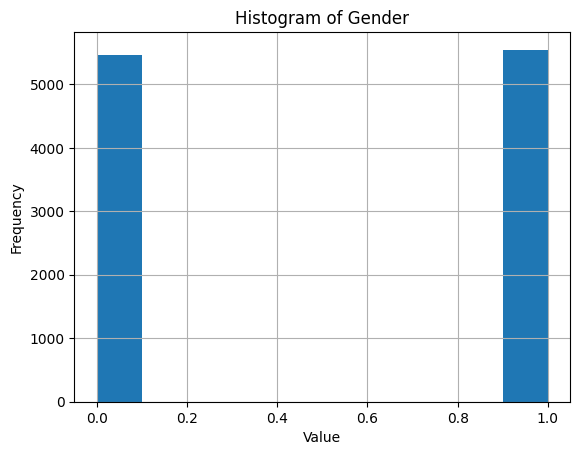

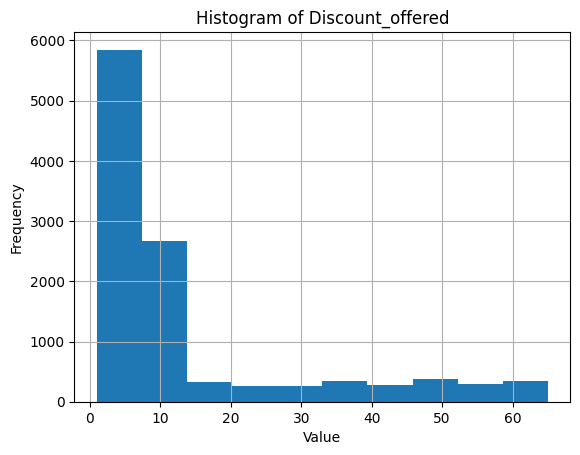

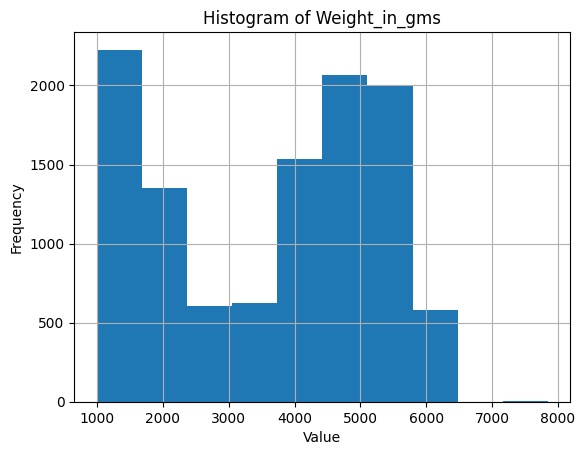

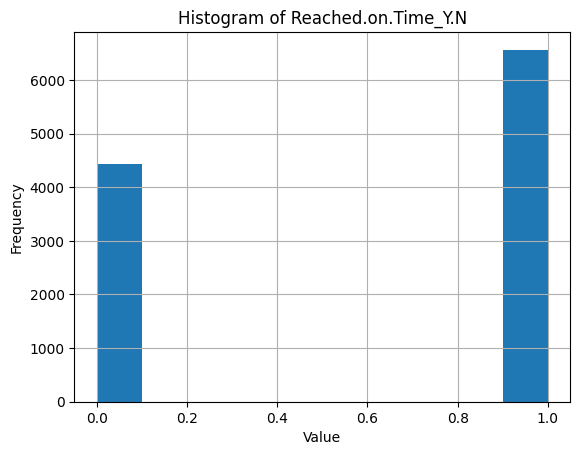

In [18]:
 for column in df.columns[1:]:
    df[column].hist()
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

Making dummy variables for categorical variables Warehouse_block and Mode_of_Shipment.

In [19]:
dummy_var = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment'])

In [20]:
dummy_var = dummy_var.astype(int)
df = pd.concat([dummy_var], axis=1)
df = df.drop(columns=['ID'])

In [21]:
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_0,Warehouse_block_1,Warehouse_block_2,Warehouse_block_3,Warehouse_block_4,Mode_of_Shipment_0,Mode_of_Shipment_1,Mode_of_Shipment_2
0,4,2,177,3,0,1,44,1233,1,0,0,0,1,0,1,0,0
1,4,5,216,2,0,0,59,3088,1,0,0,0,0,1,1,0,0
2,2,2,183,4,0,0,48,3374,1,1,0,0,0,0,1,0,0
3,3,3,176,4,1,0,10,1177,1,0,1,0,0,0,1,0,0
4,2,2,184,3,1,1,46,2484,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1,1,1538,1,1,0,0,0,0,0,0,1
10995,4,1,232,5,1,1,6,1247,0,0,1,0,0,0,0,0,1
10996,5,4,242,5,0,1,4,1155,0,0,0,1,0,0,0,0,1
10997,5,2,223,6,1,0,2,1210,0,0,0,0,0,1,0,0,1


In [22]:
# putting the y variable at the end of the dataset

column_to_move = 'Reached.on.Time_Y.N'
column = df.pop(column_to_move)
df[column.name] = column

# Normalizing the data set

In [23]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

In [24]:
df_normalized

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_0,Warehouse_block_1,Warehouse_block_2,Warehouse_block_3,Warehouse_block_4,Mode_of_Shipment_0,Mode_of_Shipment_1,Mode_of_Shipment_2,Reached.on.Time_Y.N
0,4,2,0.378505,3,0,1,0.671875,0.033893,0,0,0,1,0,1,0,0,1
1,4,5,0.560748,2,0,0,0.906250,0.304894,0,0,0,0,1,1,0,0,1
2,2,2,0.406542,4,0,0,0.734375,0.346676,1,0,0,0,0,1,0,0,1
3,3,3,0.373832,4,1,0,0.140625,0.025712,0,1,0,0,0,1,0,0,1
4,2,2,0.411215,3,1,1,0.703125,0.216654,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,0.728972,5,1,1,0.000000,0.078451,1,0,0,0,0,0,0,1,1
10995,4,1,0.635514,5,1,1,0.078125,0.035939,0,1,0,0,0,0,0,1,0
10996,5,4,0.682243,5,0,1,0.046875,0.022498,0,0,1,0,0,0,0,1,0
10997,5,2,0.593458,6,1,0,0.015625,0.030533,0,0,0,0,1,0,0,1,0


# Making training, validation and testing data sets

In [26]:
!pip install imblearn
X = df_normalized[df_normalized.columns[:-1]].values
y = df_normalized[df_normalized.columns[-1]].values

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.3 kB 165.2 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/258.3 kB 187.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.3 kB 196.9 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.3 kB 234.9 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 344.8 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 328.4 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/258.3 kB 367.6 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 461.0 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 525.1 kB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 467.2 kB

# K nearest neighbors model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=105)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=105)

In [29]:
y_prediction_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_prediction_knn))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68       640
           1       0.72      0.50      0.59       673

    accuracy                           0.64      1313
   macro avg       0.66      0.65      0.64      1313
weighted avg       0.66      0.64      0.63      1313



# Naive bayes model

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [32]:
y_prediction_nb = nb_model.predict(X_test)

In [33]:
print(classification_report(y_test, y_prediction_nb))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       640
           1       1.00      0.42      0.59       673

    accuracy                           0.70      1313
   macro avg       0.81      0.71      0.68      1313
weighted avg       0.81      0.70      0.68      1313



# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lg_model = LogisticRegression(max_iter=1000)
lg_model = lg_model.fit(X_train, y_train)

In [36]:
y_prediction_lg = lg_model.predict(X_test)
print(classification_report(y_test, y_prediction_lg))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       640
           1       0.77      0.54      0.64       673

    accuracy                           0.68      1313
   macro avg       0.70      0.69      0.68      1313
weighted avg       0.70      0.68      0.68      1313



# Support Vector Machines

In [37]:
from sklearn.svm import SVC

In [38]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [39]:
y_prediction_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_prediction_svm))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       640
           1       0.97      0.45      0.62       673

    accuracy                           0.71      1313
   macro avg       0.80      0.72      0.69      1313
weighted avg       0.80      0.71      0.69      1313



# Neural Network

In [40]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [42]:
def plot_loss(history):
  fig, (ax1, ax2) = plt.subplots(1,2)
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)
  plt.show()

In [45]:
def train_nn_model(X_train, y_train, num_nodes, dropout_rate, lr, batch_size, epochs, X_validation, y_validation):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(16,)),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr), metrics=['accuracy'])

    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_validation, y_validation), verbose=0)
    
    return nn_model, history

In the training process, sigmoid function is used on the output layer because this data set is a classification problem. Binary cross-entropy is used since the output of the model is a probability between 0 and 1 (in this case if the package arrived on time or not). Adam is used as one of the most popular choices for classification problems and we are interested in the accuracy of the model. 

The best model has 32 nodes, learning rate of 0.005, dropout rate of 0.2 and batch size of 64.

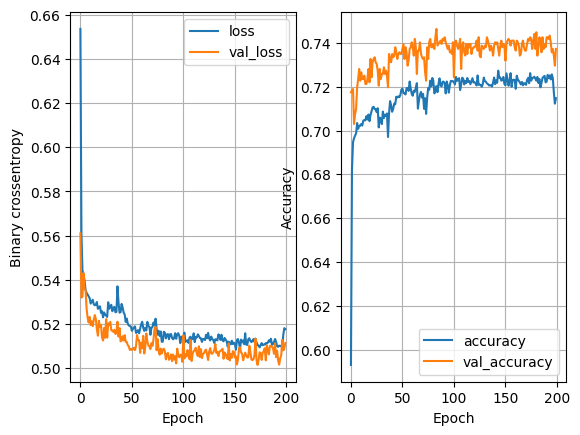

In [46]:
model, history = train_nn_model(X_train, y_train, 32, 0.2, 0.005, 64, 200, X_val, y_val)
plot_loss(history)

In [47]:
history.history['val_accuracy'][-1]

0.7372429370880127

In [48]:
history.history['val_loss'][-1]

0.5113478899002075

In [49]:
model.evaluate(X_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7281 - loss: 0.5175


[0.5186618566513062, 0.7265803217887878]

The model isn't overfitting and it's accuracy on test data indicates good performance on unseen data despite the lower accuracy as opposed to validation accuracy.

# Random forest classification

In [52]:
!pip install graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 960.0 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 960.0 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 181.7 kB/s eta 0:00:00


Since random forest classification doesn't need normalization, we will be splitting the original dataset before normalization.

In [54]:
X_df = df[df.columns[:-1]].values
y_df = df[df.columns[-1]].values

oversampler = RandomOverSampler(random_state=42)

X_resampled_df, y_resampled_df = oversampler.fit_resample(X_df, y_df)

X_train_df, X_temp_df, y_train_df, y_temp_df = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2, random_state=42)
X_val_df, X_test_df, y_val_df, y_test_df = train_test_split(X_temp_df, y_temp_df, test_size=0.5, random_state=42)

In [55]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_df, y_train_df)

RandomForestClassifier(random_state=42)

In [56]:
y_prediction_rf = rf.predict(X_test_df)
print(classification_report(y_test_df, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       640
           1       0.86      0.59      0.70       673

    accuracy                           0.74      1313
   macro avg       0.77      0.74      0.73      1313
weighted avg       0.77      0.74      0.73      1313



In [63]:
!pip install graphviz
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=df.columns[:-1],  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [67]:
df = pd.read_csv('Train.csv')

After visualizing our tree, we will tune some hyperparameters.

n_estimators - number of trees in the forest; increasing this can improve performance but increase the time it need to train and predict 



In [68]:
param = {'n_estimators' : randint(50,500)}

rand_search = RandomizedSearchCV(rf, param_distributions = param, n_iter = 5, cv = 5)

rand_search.fit(X_train_df, y_train_df)

best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 479}


The best hyperparameters that were found by the algorithm is 463 trees in a forest.

Model below shows the best parameters.

In [69]:
best_rf = RandomForestClassifier(n_estimators=350, random_state=42)
best_rf.fit(X_train_df, y_train_df)

y_best_prediction_rf = best_rf.predict(X_test_df)
print(classification_report(y_test_df, y_best_prediction_rf))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       640
           1       0.86      0.58      0.69       673

    accuracy                           0.74      1313
   macro avg       0.77      0.74      0.73      1313
weighted avg       0.77      0.74      0.73      1313



Since the number of trees doesn't improve performance it will be set to 350 to improve run time.

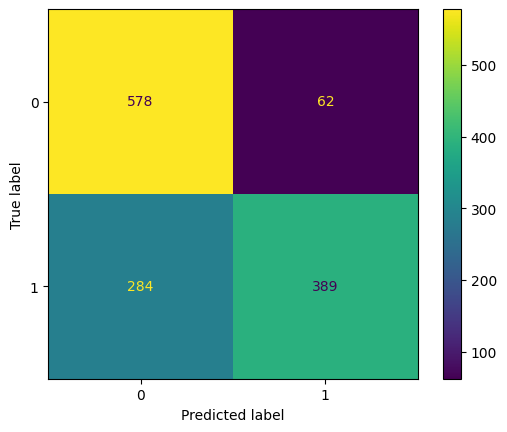

In [70]:
cm = confusion_matrix(y_test_df, y_best_prediction_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Looking at the cofusion matrix we can see that the model predicts better when the package doesn't arrive on time (1) then when the package arrives on time (0). We can see that it predicts 0 more times than one which indicates there is bias present. The bias will try to be normalized by using the original data set without oversampling the output variable.

In [72]:
print(len(best_rf.feature_importances_))
print(df.columns[:-1])


16
Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [73]:
feature_names = [col for col in df.columns if col in training_feature_columns]
feature_importances = pd.Series(best_rf.feature_importances_, index=feature_names).sort_values(ascending=False)


NameError: name 'training_feature_columns' is not defined

In [74]:
df = pd.read_csv('Train.csv')

In [75]:
df = pd.read_csv('Train.csv')

Splitting the original data set without oversampling to remove bias. 


In [76]:
X_no = df[df.columns[:-1]].values
y_no = df[df.columns[-1]].values

X_train_no, X_temp_no, y_train_no, y_temp_no = train_test_split(X_no, y_no, test_size=0.2, random_state=42)
X_val_no, X_test_no, y_val_no, y_test_no = train_test_split(X_temp_no, y_temp_no, test_size=0.5, random_state=42)

In [77]:
best_rf_no = RandomForestClassifier(n_estimators=350, random_state=42)
best_rf_no.fit(X_train_no, y_train_no)

y_best_prediction_rf_no = best_rf_no.predict(X_test_no)
print(classification_report(y_test_no, y_best_prediction_rf_no))

ValueError: could not convert string to float: 'F'

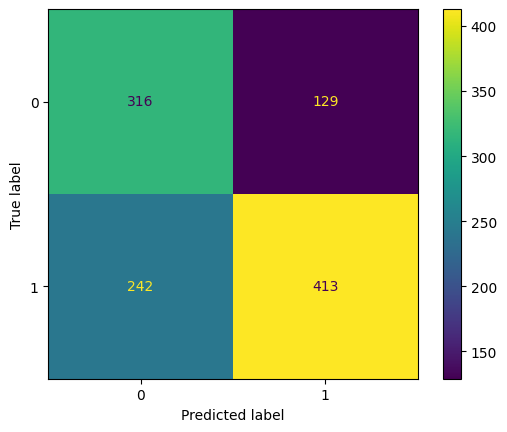

In [ ]:
cm_no = confusion_matrix(y_test_no, y_best_prediction_rf_no)
ConfusionMatrixDisplay(confusion_matrix=cm_no).plot();

With removing the oversampling part before splitting the data, the bias for predicting 1 has sligthly lowered but at the cost of lowering the overall accuracy of the model by 8%. 

# Conclusions

> Looking at the classification reports for each model, the best accuracy over all was the random forest classification model with an accuracy of 74% and closely followed by the neural network model with an accuracy of 72.58%. Support vector machine model also has a high accuracy of 71%. 
> 

In [78]:
import pickle

# assume 'model' is your trained model and 'scaler' is your scaling object
with open('model_and_scaler.pkl', 'wb') as f:
    pickle.dump((model, scaler), f)

In [79]:
import pickle

# assume 'model' is your trained model and 'scaler' is your scaling object

# save model to a separate pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# save scaler to a separate pickle file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)